# Load libraries and dataframe

In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

df = pd.read_csv("../input/adult-census-income/adult.csv")
df

/kaggle/input/adult-census-income/adult.csv


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


# Initial exploration of the data


In [28]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [29]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# Data Cleaning: Remove rows with question marks

In [30]:
df = df[~((df['age'] == '?' ) | (df['workclass'] == '?' ) | (df['education'] == '?' ) | (df['education.num'] == '?' ) | (df['marital.status'] == '?' ) | (df['occupation'] == '?' ) | (df['relationship'] == '?' )  | (df['race'] == '?' ) | (df['sex'] == '?' ) | (df['capital.gain'] == '?' ) | (df['capital.loss'] == '?' ) | (df['hours.per.week'] == '?' )  | (df['native.country'] == '?' ) | (df['income'] == '?' ))]


# Data Cleaning: Correcting column names to be more appropriate for Pandas

In [31]:
df.columns = ['age', 'workclass', 'fnlwgt', 'edu', 'edu_num', 'marital', 'occupation', 'relationship', 'race', 'sex', 'capgain', 'caploss', 'hourspw', 'country', 'income']
df

,age,workclass,fnlwgt,edu,edu_num,marital,occupation,relationship,race,sex,capgain,caploss,hourspw,country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


# Data Cleaning: Making a new column that is the difference of capgain and caploss

In [32]:
# df['capital.agg'] = df['capital.gain'] - df['capital.loss']
# df = df.assign(capital.agg = df['capital.gain'] - df['capital.loss'])

pd.set_option('mode.chained_assignment', None)

df.loc[:,"capagg"] = df.capgain - df.caploss
df

,age,workclass,fnlwgt,edu,edu_num,marital,occupation,relationship,race,sex,capgain,caploss,hourspw,country,income,capagg
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,-4356
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,-3900
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,-3900
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K,-3770
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K,-3770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,0
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0


# Data Cleaning: Making a subset that only has people born outside of US 

In [33]:
foreignborn = df.loc[df['country'] != "United-States"]
foreignborn

,age,workclass,fnlwgt,edu,edu_num,marital,occupation,relationship,race,sex,capgain,caploss,hourspw,country,income,capagg
26,33,Private,228696,1st-4th,2,Married-civ-spouse,Craft-repair,Not-in-family,White,Male,0,2603,32,Mexico,<=50K,-2603
27,49,Private,122066,5th-6th,3,Married-civ-spouse,Other-service,Husband,White,Male,0,2603,40,Greece,<=50K,-2603
47,73,Self-emp-not-inc,233882,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Asian-Pac-Islander,Male,0,2457,40,Vietnam,<=50K,-2457
63,51,Self-emp-not-inc,160724,Bachelors,13,Married-civ-spouse,Sales,Husband,Asian-Pac-Islander,Male,0,2415,40,China,>50K,-2415
67,55,Self-emp-inc,124137,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,35,Greece,>50K,-2415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32468,85,Private,98611,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,3,Poland,<=50K,0
32513,45,Private,155093,10th,6,Divorced,Other-service,Not-in-family,Black,Female,0,0,38,Dominican-Republic,<=50K,0
32536,54,Private,337992,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K,0
32549,43,Private,260761,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K,0


# Summarizing some aspect of the data


In [34]:
print("Descriptive statistics of entire data base")
df_summary = df.describe()
df_summary

Descriptive statistics of entire data base


,age,fnlwgt,edu_num,capgain,caploss,hourspw,capagg
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238,1003.635369
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984,7430.372730
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,-4356.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,99999.000000


In [35]:
print("Descriptive statistics of immigrants subset")
fb_summary = foreignborn.describe()
fb_summary

Descriptive statistics of immigrants subset


,age,fnlwgt,edu_num,capgain,caploss,hourspw,capagg
count,2658.000000,2.658000e+03,2658.000000,2658.000000,2658.000000,2658.00000,2658.000000
mean,37.750941,2.181343e+05,9.077878,797.183973,68.709556,40.51994,728.474417
std,12.590824,1.109478e+05,3.747431,6236.080589,357.771715,11.32198,6255.101219
min,17.000000,1.487800e+04,1.000000,0.000000,0.000000,1.00000,-2603.000000
25%,28.000000,1.426922e+05,7.000000,0.000000,0.000000,40.00000,0.000000
50%,36.000000,2.000890e+05,9.000000,0.000000,0.000000,40.00000,0.000000
75%,46.000000,2.705170e+05,13.000000,0.000000,0.000000,40.00000,0.000000
max,90.000000,1.161363e+06,16.000000,99999.000000,2603.000000,99.00000,99999.000000


# Summarizing some aspect of the data: What are the differences beteween the general df and the immigrants df?

In [36]:
ne = df_summary - fb_summary
ne

,age,fnlwgt,edu_num,capgain,caploss,hourspw,capagg
count,27504.000000,27504.000000,27504.000000,27504.000000,27504.000000,27504.000000,27504.000000
mean,0.686961,-28340.444851,1.043433,294.823885,19.662933,0.411298,275.160952
std,0.543841,-5294.870263,-1.197436,1170.265907,46.526656,0.658005,1175.271511
min,0.000000,-1109.000000,0.000000,0.000000,0.000000,0.000000,-1753.000000
25%,0.000000,-25065.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,-21664.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,-32888.500000,0.000000,0.000000,0.000000,5.000000,0.000000
max,0.000000,323342.000000,0.000000,0.000000,1753.000000,0.000000,0.000000


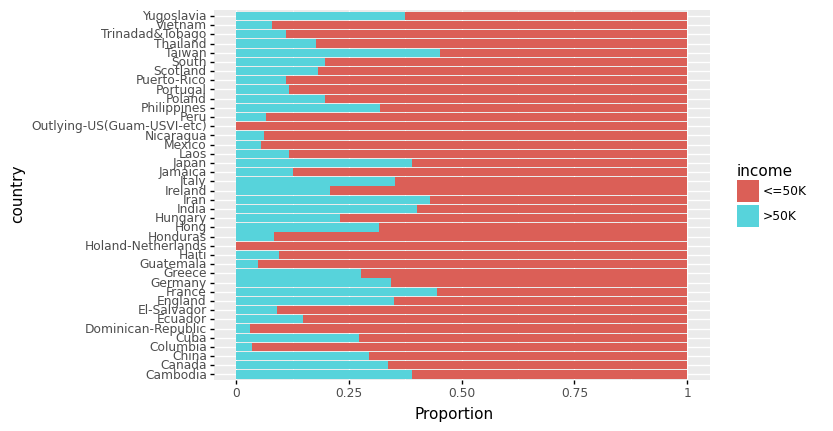

<ggplot: (8747017593637)>

In [37]:
# (ggplot(mpg)
#  + aes(x='displ', y='hwy', color='class')
#  + geom_point()
#  + labs(title='Engine Displacement vs. Highway Miles per Gallon', x='Engine Displacement, in Litres', y='Highway Miles per Gallon')
# )

from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline
(ggplot(foreignborn)
+ aes(x = 'country', fill = 'income') 
+ geom_bar(position = "fill") 
+ coord_flip()
+ labs(y = "Proportion"))

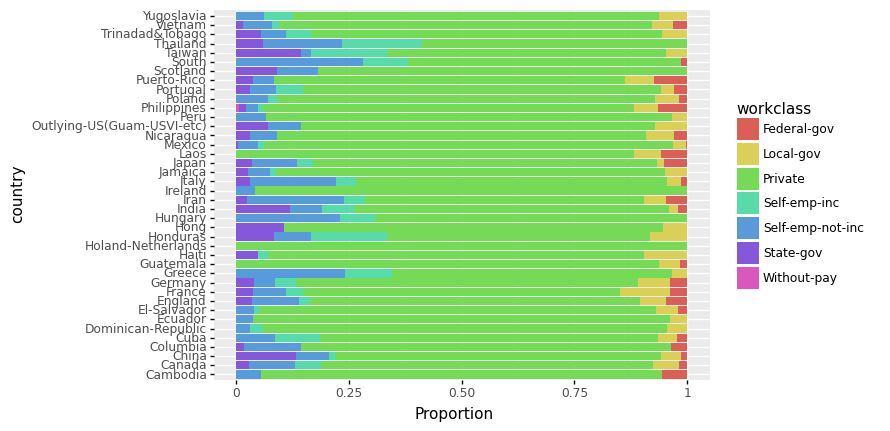

<ggplot: (8747017163249)>

In [38]:
(ggplot(foreignborn)
+ aes(x = 'country', fill = 'workclass') 
+ geom_bar(position = "fill") 
+ coord_flip()
+ labs(y = "Proportion"))

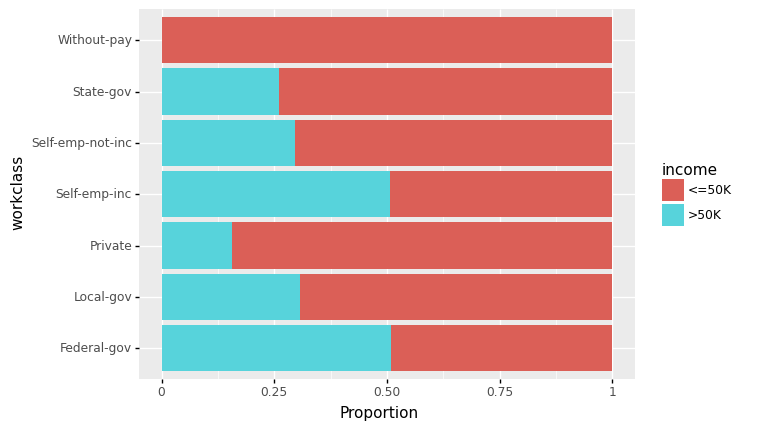

<ggplot: (8747017121569)>

In [39]:
(ggplot(foreignborn)
+ aes(x = 'workclass', fill = 'income') 
+ geom_bar(position = "fill") 
+ coord_flip()
+ labs(y = "Proportion"))

# Data Visualization: Box plots of education and income vs relationship roles 

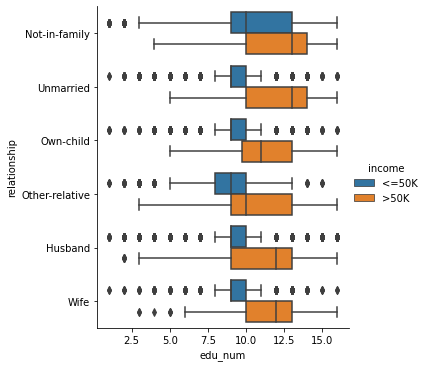

In [40]:
ax = sns.catplot(x="edu_num", y="relationship", hue="income",  kind="box", data=df)


# Data Visualization: Box plots of education level and race

<AxesSubplot:xlabel='edu_num', ylabel='race'>

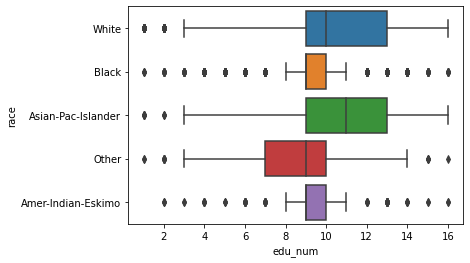

In [41]:
sns.boxplot(y=df["race"], x=df["edu_num"])


# Data Visualization: Boxplots of education level and race for immigrants

<AxesSubplot:xlabel='edu_num', ylabel='race'>

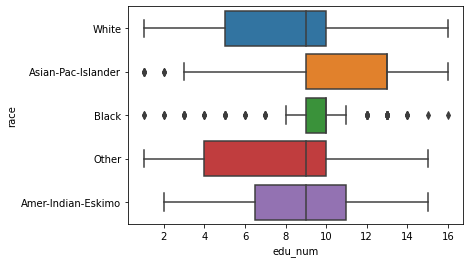

In [42]:
sns.boxplot(y=foreignborn["race"], x=foreignborn["edu_num"])


# Data Visualization: Education level, sex vs race

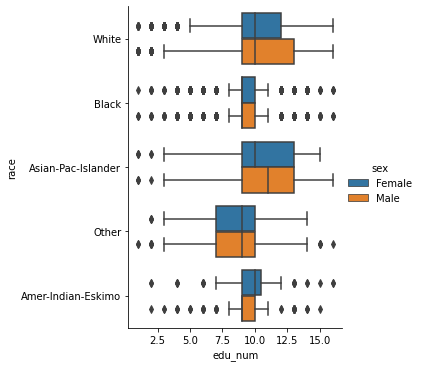

In [43]:
ax = sns.catplot(x="edu_num", y="race", hue="sex",  kind="box", data=df)


# Data Visualization: Marital status, sex vs education level

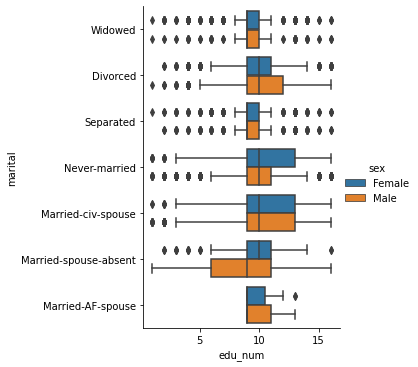

In [44]:
ax = sns.catplot(x="edu_num", y="marital", hue="sex",  kind="box", data=df)


# Data Visualization: Marital status, sex vs hours of work per week

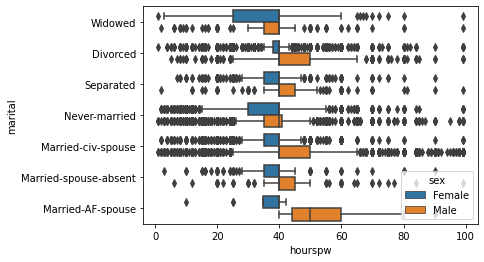

In [45]:
ax = sns.boxplot(x="hourspw", y="marital", hue="sex", data=df)


# Data Visualization: Marital Status, income, vs hours of work per week

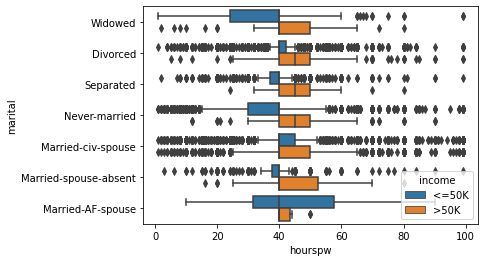

In [46]:
ax = sns.boxplot(x="hourspw", y="marital", hue="income", data=df)


# Data Visualization: Marital Status, income, vs education level

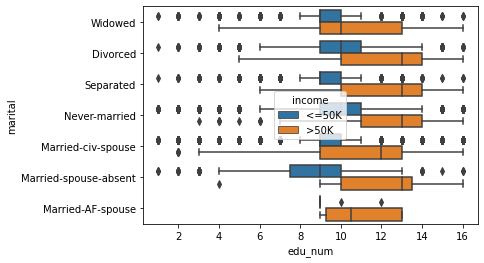

In [47]:
ax = sns.boxplot(x="edu_num", y="marital", hue="income", data=df)


# Data Visualization: Age vs Education level

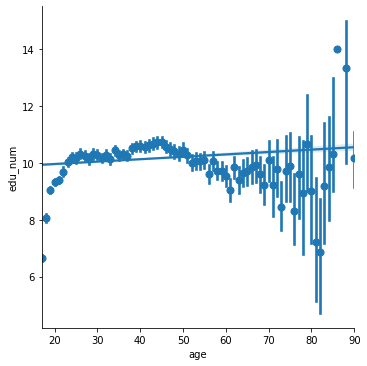

In [48]:
sns.lmplot(x="age", y="edu_num", data=df, x_estimator=np.mean);
